In [1]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pickle
import joblib
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf

Class and Class ID :-
1. Asthma
2. Bronchiectasis
3. Bronchiolitis
4. Copd
5. Healthy
6. LRTI
7. Pneumonia
8. URTI

In [5]:
X=np.load('X.npy')

In [3]:
y=np.load('y.npy')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)
print(X_train.shape,X_test.shape)

(665, 128, 4800, 3) (222, 128, 4800, 3)


In [8]:
X_train = np.array((X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)))
X_test = np.array((X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)))
X_train = X_train/np.std(X_train)
X_test = X_test/np.std(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
print(X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val))

(498, 128, 4800, 3) (222, 128, 4800, 3) (167, 128, 4800, 3) 498 222 167


<Font size = 6> <b> CNN Model </b></font>

<Font size = 5.5><b>Complex model</b></Font>

In [51]:
input_shape=(128,4800,3)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(64, activation='relu'))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(24, activation='softmax'))

In [52]:
CNNmodel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

<b> Epoch = 5 </b>

In [53]:
history = CNNmodel.fit(X_train, y_train, epochs=5, validation_data= (X_val, y_val))

Epoch 1/5
16/16 [==============================] - 223s 14s/step - loss: 284.8887 - accuracy: 0.7028 - val_loss: 3.1468 - val_accuracy: 0.8982
Epoch 2/5
16/16 [==============================] - 130s 8s/step - loss: 0.8853 - accuracy: 0.8775 - val_loss: 3.1158 - val_accuracy: 0.8982
Epoch 3/5
16/16 [==============================] - 129s 8s/step - loss: 0.7978 - accuracy: 0.8735 - val_loss: 3.0870 - val_accuracy: 0.8982
Epoch 4/5
16/16 [==============================] - 128s 8s/step - loss: 0.7813 - accuracy: 0.8775 - val_loss: 3.0537 - val_accuracy: 0.8982
Epoch 5/5
16/16 [==============================] - 128s 8s/step - loss: 0.6668 - accuracy: 0.8896 - val_loss: 3.0264 - val_accuracy: 0.8982


<b> Epoch = 20 </b>

In [31]:
history = CNNmodel.fit(X_train, y_train, epochs=20, validation_data= (X_val, y_val))

Epoch 1/20
16/16 [==============================] - 180s 11s/step - loss: 284.2508 - accuracy: 0.6787 - val_loss: 3.1564 - val_accuracy: 0.8982
Epoch 2/20
16/16 [==============================] - 111s 7s/step - loss: 1.2806 - accuracy: 0.8715 - val_loss: 3.1247 - val_accuracy: 0.8982
Epoch 3/20
16/16 [==============================] - 110s 7s/step - loss: 0.9784 - accuracy: 0.8775 - val_loss: 3.0946 - val_accuracy: 0.8982
Epoch 4/20
16/16 [==============================] - 110s 7s/step - loss: 0.9833 - accuracy: 0.8876 - val_loss: 3.0635 - val_accuracy: 0.8982
Epoch 5/20
16/16 [==============================] - 110s 7s/step - loss: 0.8207 - accuracy: 0.8876 - val_loss: 3.0336 - val_accuracy: 0.8982
Epoch 6/20
16/16 [==============================] - 110s 7s/step - loss: 0.9839 - accuracy: 0.8855 - val_loss: 3.0051 - val_accuracy: 0.8982
Epoch 7/20
16/16 [==============================] - 112s 7s/step - loss: 1.0148 - accuracy: 0.8855 - val_loss: 2.9652 - val_accuracy: 0.8982
Epoch 8/20

<Font size = 5.5><b>Simpler model</b></Font>

In [25]:
input_shape=(128,4800,3)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(24, activation='softmax'))
CNNmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 4798, 32)     896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 2399, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4836384)           0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                154764320 
_________________________________________________________________
dense_8 (Dense)              (None, 24)                792       
Total params: 154,766,008
Trainable params: 154,766,008
Non-trainable params: 0
_________________________________________________________________


<b> Epoch = 5 (decreasing overfitting) </b>

In [20]:
history = CNNmodel.fit(X_train, y_train, epochs=5, validation_data= (X_val, y_val))

Epoch 1/5
16/16 [==============================] - 56s 4s/step - loss: 7325.6802 - accuracy: 0.5000 - val_loss: 1390.9281 - val_accuracy: 0.8982
Epoch 2/5
16/16 [==============================] - 57s 4s/step - loss: 406.6810 - accuracy: 0.5321 - val_loss: 3.1595 - val_accuracy: 0.0479
Epoch 3/5
16/16 [==============================] - 50s 3s/step - loss: 3.1467 - accuracy: 0.3534 - val_loss: 3.1303 - val_accuracy: 0.8982
Epoch 4/5
16/16 [==============================] - 49s 3s/step - loss: 106.5168 - accuracy: 0.7771 - val_loss: 3.1010 - val_accuracy: 0.8982
Epoch 5/5
16/16 [==============================] - 46s 3s/step - loss: 3.0880 - accuracy: 0.8916 - val_loss: 3.0719 - val_accuracy: 0.8982


 <b>Epoch = 20 (decreasing overfitting) </b>

In [27]:
history = CNNmodel.fit(X_train, y_train, epochs=20, validation_data= (X_val, y_val))

Epoch 1/20
16/16 [==============================] - 230s 14s/step - loss: 5213.9009 - accuracy: 0.5502 - val_loss: 2017.5857 - val_accuracy: 0.8982 - ETA: 3:52 - loss: 12291.8154
Epoch 2/20
16/16 [==============================] - 90s 6s/step - loss: 960.8845 - accuracy: 0.8916 - val_loss: 1210.3083 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 66s 4s/step - loss: 95.8411 - accuracy: 0.1426 - val_loss: 3.1542 - val_accuracy: 0.0359
Epoch 4/20
16/16 [==============================] - 50s 3s/step - loss: 3.1363 - accuracy: 0.1406 - val_loss: 3.1181 - val_accuracy: 0.8982
Epoch 5/20
16/16 [==============================] - 50s 3s/step - loss: 3.1034 - accuracy: 0.8916 - val_loss: 3.0862 - val_accuracy: 0.8982
Epoch 6/20
16/16 [==============================] - 50s 3s/step - loss: 3.0724 - accuracy: 0.8916 - val_loss: 3.0558 - val_accuracy: 0.8982
Epoch 7/20
16/16 [==============================] - 51s 3s/step - loss: 3.0428 - accuracy: 0.8916 - val_loss: 3

<b> For plotting</b>

<b> For epoch = 5 </b>

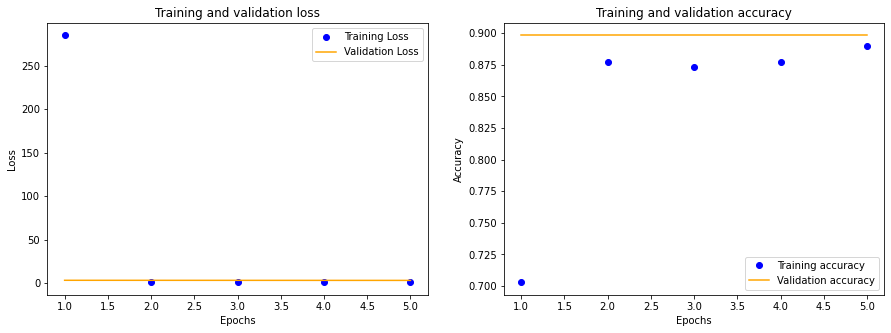

In [54]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,6)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [55]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

<b> For epoch = 5 ----- F1, Precision, Recall</b>

In [56]:
# predict probabilities for test set
yhat_probs = CNNmodel.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = CNNmodel.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]


In [57]:
display(yhat_classes)
display(y_test)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

array([4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 7, 8, 4, 4, 4, 4, 4, 4, 4, 4, 6,
       8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 6, 7, 4, 6,
       4, 4, 7, 6, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 6, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4,
       4, 6, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

In [58]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, pos_label='positive',average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,pos_label='positive',average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.891892
Precision: 0.891892
Recall: 0.891892
F1 score: 0.891892


In [59]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs, multi_class='ovr')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.000000


AxisError: axis 1 is out of bounds for array of dimension 1

<b> For epoch = 5 (decreasing overfitting) </b>

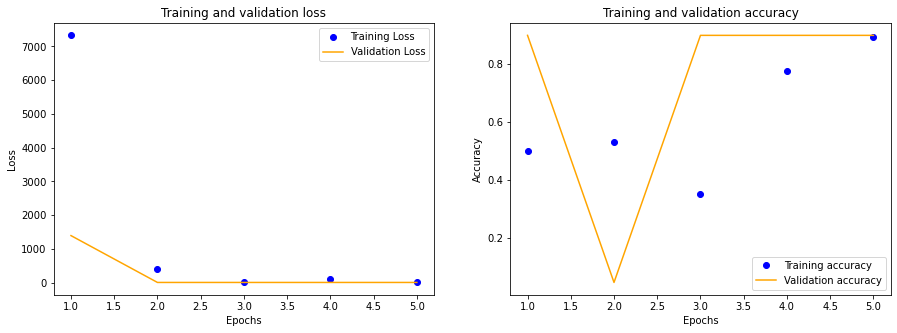

In [23]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,6)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

<b> For epoch = 20  </b>

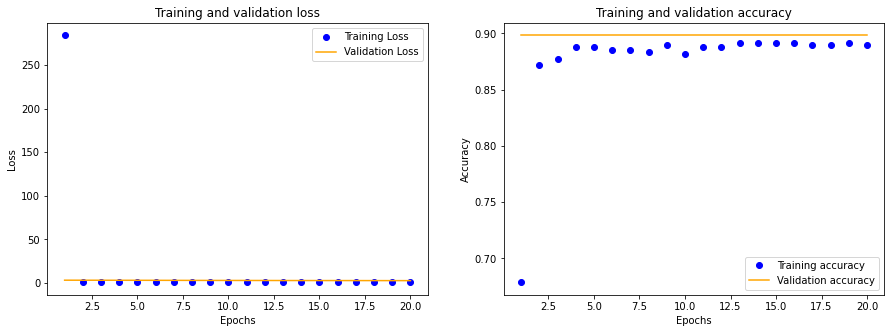

In [32]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,21)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

<b> For epoch = 20 ----- F1, Precision, Recall</b>

In [39]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [33]:
# predict probabilities for test set
yhat_probs = CNNmodel.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = CNNmodel.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [42]:
display(yhat_classes)
display(y_test)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

array([4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 7, 8, 4, 4, 4, 4, 4, 4, 4, 4, 6,
       8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 6, 7, 4, 6,
       4, 4, 7, 6, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 6, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4,
       4, 6, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

In [48]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, pos_label='positive',average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,pos_label='positive',average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.891892
Precision: 0.891892
Recall: 0.891892
F1 score: 0.891892


In [50]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs, multi_class='ovr')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.000000


AxisError: axis 1 is out of bounds for array of dimension 1

<b> For epoch = 20 (decreasing overfitting) </b>

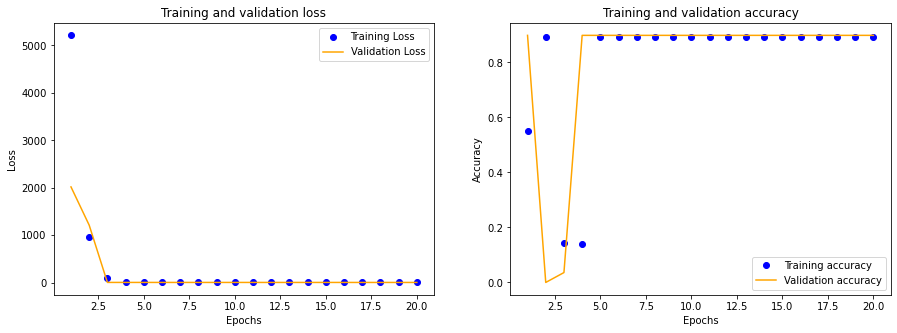

In [28]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,21)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()